<a id="overview"></a>

# Overview

The motivation and the data used for this project came from the [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview) competition from Kaggle.

1. [Data Preprocessing](#data_preprocessing)
1. [Application of Classification Algorithms](#application_of_classification_algorithms)
1. [Predictions](#predictions)

In [163]:
import pandas as pd
import seaborn as sb

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [164]:
# Set-up Data
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

# print(train_data.columns)
# print(train_data.head())

<a id="data_preprocessing"></a>

## I. Data Preprocessing

<a id="handling_missing_data"></a>

### A. Handling Missing Data

<AxesSubplot:>

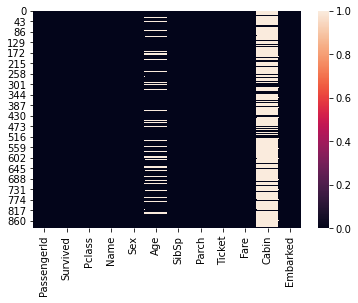

In [165]:
# Check Number of Missing Values

sb.heatmap(train_data.isnull())

# Age (177) Cabin (687), Embarked (2)
# train_data.isnull().sum()

# Age (86) Fare (1) Cabin (327)
# test_data.isnull().sum()

<AxesSubplot:>

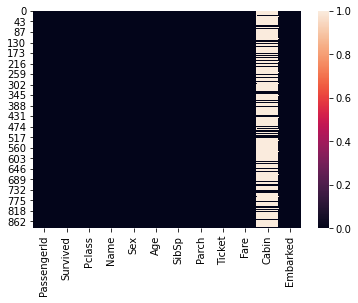

In [166]:
# Imputate Missing Age Values with Interpolate
train_data["Age"] = train_data["Age"].interpolate()

# Remove Embarked Rows
train_data = train_data.dropna(subset=["Embarked"])

sb.heatmap(train_data.isnull())

<a id="fixing_categorical_data"></a>

### B. Fixing Categorical Data

In [167]:
# Create Dummy Columns for Categorical Data (Age, Embarked)

dummy = pd.get_dummies(train_data, drop_first=True, columns=["Sex"])
dummy = pd.get_dummies(dummy, drop_first=True, columns=["Embarked"], prefix="Emb")

train_data = dummy

In [168]:
# Determine Relevant Features

features = train_data.columns.difference({"PassengerId", "Survived", "Name", "Ticket", "Cabin"})

In [169]:
train_x = pd.get_dummies(train_data[features])
train_y = train_data['Survived']

<a id="application_of_classification_algorithms"></a>

## II. Application of Classification Algorithms
1. [Decision Tree Classifier](#decision_tree_classifier)
1. [Random Forest Classifier](#random_forest_classifier)
1. [Gradient Boosting Classifier](#gradient_boosting_classifier)
1. [Naive Bayes Classifier](#naive_bayes_classifier)
1. [K-Nearest Neigbors Classifier](#k_neigbors_classifier)
1. [Logistic Regression](#logistic_regression)
1. [Support Vector Machine Classifier](#support_vector_machine_classifier)

In [170]:
# Split Data Sets
s_train_x, s_test_x, s_train_y, s_test_y = train_test_split(train_x, train_y, train_size= 0.7, random_state=0)

<a id="decision_tree_classifier"></a>

### A. Decision Tree Classifier

In [171]:
# Check best DT scores based on depth
def get_score_dtc(max_depth, train_x, train_y, test_x, test_y):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    model.fit(train_x, train_y)
    score = model.score(test_x, test_y)
    print("Max Depth: {0} \t Score: {1}".format(max_depth, score))
    return score

In [172]:
# Model Validation

max_depth = [1, 2, 3, 4, 5]

scores = {
    candidate_max_depth: get_score_dtc(candidate_max_depth, s_train_x, s_train_y, s_test_x, s_test_y)
    for candidate_max_depth in max_depth
}

best_max_depth = max(scores, key=scores.get)

print("Best Max Depth: {0}".format(best_tree_size))

Max Depth: 1 	 Score: 0.7677902621722846
Max Depth: 2 	 Score: 0.7752808988764045
Max Depth: 3 	 Score: 0.7902621722846442
Max Depth: 4 	 Score: 0.7865168539325843
Max Depth: 5 	 Score: 0.7865168539325843
Best Max Depth: 3


In [173]:
# Perform Algorithm

dtc_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=0)
dtc_model.fit(s_train_x, s_train_y)
dtc_score = dtc_model.score(s_test_x, s_test_y)

print("Model: {0} \t Score: {1}".format("Decision Tree Classifier", dtc_score))

Model: Decision Tree Classifier 	 Score: 0.7902621722846442


<a id="random_forest_classifier"></a>

### B. Random Forest Classifier

In [174]:
# Perform Algorithm

rfc_model = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_model.fit(s_train_x, s_train_y)
rfc_score = rfc_model.score(s_test_x, s_test_y)

print("Model: {0} \t Score: {1}".format("Random Forest Classifier", rfc_score))

Model: Random Forest Classifier 	 Score: 0.7715355805243446


<a id="gradient_boosting_classifier"></a>

### C. Gradient Boosting Classifier

In [175]:
gbc_model = GradientBoostingClassifier(n_estimators=50, random_state=0)
gbc_model.fit(s_train_x, s_train_y)
gbc_score = gbc_model.score(s_test_x, s_test_y)

print("Model: {0} \t Score: {1}".format("Gradient Boosting Classifier", gbc_score))

Model: Gradient Boosting Classifier 	 Score: 0.7715355805243446


<a id="naive_bayes_classifier"></a>

### D. Naive Bayes Classifier

In [176]:
nb_model = GaussianNB()
nb_model.fit(s_train_x, s_train_y)
nb_score = nb_model.score(s_test_x, s_test_y)

print("Model: {0} \t Score: {1}".format("Naive Bayes Classifier", nb_score))

Model: Naive Bayes Classifier 	 Score: 0.7565543071161048


<a id="k_neighbors_classifier"></a>

### E. K-Nearest Neigbors Classifier

In [177]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(s_train_x, s_train_y)
knn_score = knn_model.score(s_test_x, s_test_y)

print("Model: {0} \t Score: {1}".format("K-Nearest Neigbors Classifier", knn_score))

Model: K-Nearest Neigbors Classifier 	 Score: 0.6666666666666666


<a id="logistic_regression"></a>

### F. Logistic Regression

In [178]:
lr_model = LogisticRegression()
lr_model.fit(s_train_x, s_train_y)
lr_score = lr_model.score(s_test_x, s_test_y)

print("Model: {0} \t Score: {1}".format("Logistic Regression", lr_score))

Model: Logistic Regression 	 Score: 0.7640449438202247


C:\Users\User\anaconda3\envs\titanic-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<a id="support_vector_machine_classifier"></a>

### G. Support Vector Machine Classifier

In [179]:
svmc_model = SVC(probability=True, kernel="linear")
svmc_model.fit(s_train_x, s_train_y)
svmc_score = svmc_model.score(s_train_x, s_train_y)

print("Model: {0} \t Score: {1}".format("Support Vector Machine Classifier", svmc_score))

Model: Support Vector Machine Classifier 	 Score: 0.8006430868167203


## III. Predictions

In [131]:
res = pd.DataFrame({"PassengerId": test_data['PassengerId'], "Survived": pred})
res.to_csv("Titanic Submission_3.csv", index = False)

NameError: name 'pred' is not defined